In [1]:
#upload data ke google colab
from google.colab import files
uploaded = files.upload()

Saving credit.xlsx to credit.xlsx


In [2]:
#load data
import pandas as pd

df = pd.read_excel("credit.xlsx")
df

,Unnamed: 0,Catatan_kredit,Utang,Jaminan,Pendapatan,Risiko
0,1,buruk,rendah,tidak_ada,0-15,tinggi
1,2,tidak_diketahui,tinggi,tidak_ada,15-35,tinggi
2,3,tidak_diketahui,rendah,tidak_ada,15-35,rendah
3,4,buruk,rendah,tidak_ada,0-15,tinggi
4,5,tidak_diketahui,rendah,ada,>35,rendah
...,...,...,...,...,...,...
115,116,baik,tinggi,ada,15-35,rendah
116,117,baik,tinggi,tidak_ada,15-35,rendah
117,118,baik,tinggi,ada,15-35,rendah
118,119,tidak_diketahui,rendah,tidak_ada,15-35,tinggi


In [3]:
#Data preparation (Cek tipe data dan mmissing value)
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      120 non-null    int64 
 1   Catatan_kredit  120 non-null    object
 2   Utang           120 non-null    object
 3   Jaminan         120 non-null    object
 4   Pendapatan      120 non-null    object
 5   Risiko          120 non-null    object
dtypes: int64(1), object(5)
memory usage: 5.8+ KB


Unnamed: 0        0
Catatan_kredit    0
Utang             0
Jaminan           0
Pendapatan        0
Risiko            0
dtype: int64

In [4]:
#import LabelEncoder
from sklearn.preprocessing import LabelEncoder

In [5]:
#konversi nilai variabel ke numerik
label_encoder = LabelEncoder()
categorical_columns = ['Catatan_kredit', 'Utang', 'Jaminan', 'Pendapatan']

for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])

df

,Unnamed: 0,Catatan_kredit,Utang,Jaminan,Pendapatan,Risiko
0,1,1,0,1,0,tinggi
1,2,2,1,1,1,tinggi
2,3,2,0,1,1,rendah
3,4,1,0,1,0,tinggi
4,5,2,0,0,2,rendah
...,...,...,...,...,...,...
115,116,0,1,0,1,rendah
116,117,0,1,1,1,rendah
117,118,0,1,0,1,rendah
118,119,2,0,1,1,tinggi


In [6]:
#import library untuk split data
from sklearn.model_selection import train_test_split

In [11]:
#deklarasi data X dan y
X = df.drop('Risiko', axis=1)
y = df['Risiko']

#splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [12]:
#membangun model Decision Tree
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [13]:
#menerapkan model untuk prediksi
y_pred = model.predict(X_test)
print("Predicted Values:")
print(y_pred)
print("Actual Values")
print(y_test.values)

Predicted Values:
['rendah' 'rendah' 'tinggi' 'rendah' 'rendah' 'tinggi' 'rendah' 'tinggi'
 'tinggi' 'tinggi' 'tinggi' 'rendah' 'rendah' 'tinggi' 'rendah' 'rendah'
 'tinggi' 'tinggi' 'tinggi' 'rendah' 'tinggi' 'tinggi' 'tinggi' 'rendah'
 'tinggi' 'tinggi' 'tinggi' 'rendah' 'tinggi' 'rendah' 'tinggi' 'rendah'
 'rendah' 'rendah' 'tinggi' 'rendah']
Actual Values
['tinggi' 'rendah' 'rendah' 'tinggi' 'rendah' 'rendah' 'rendah' 'tinggi'
 'tinggi' 'rendah' 'tinggi' 'rendah' 'tinggi' 'rendah' 'rendah' 'rendah'
 'tinggi' 'tinggi' 'rendah' 'tinggi' 'tinggi' 'tinggi' 'tinggi' 'rendah'
 'tinggi' 'rendah' 'tinggi' 'rendah' 'tinggi' 'rendah' 'tinggi' 'rendah'
 'rendah' 'rendah' 'tinggi' 'rendah']


In [14]:
#evaluasi model
from sklearn.metrics import confusion_matrix, classification_report

conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Confusion Matrix:
[[13  6]
 [ 4 13]]

Classification Report:
              precision    recall  f1-score   support

      rendah       0.76      0.68      0.72        19
      tinggi       0.68      0.76      0.72        17

    accuracy                           0.72        36
   macro avg       0.72      0.72      0.72        36
weighted avg       0.73      0.72      0.72        36



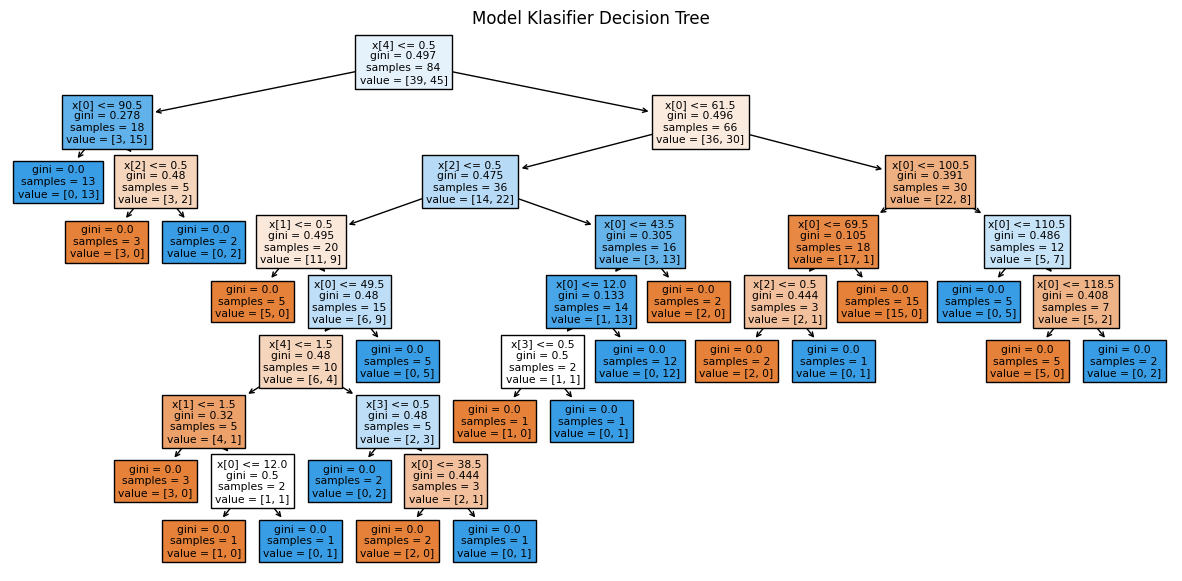

In [15]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

#creat plot size 15,7
plt.figure(figsize=(15, 7))
plot_tree(model, filled=True)
plt.title('Model Klasifier Decision Tree')
plt.show()